In [1]:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/input_data.py

"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

mnist_images = read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
learning_rate = 0.001
training_epochs = 100
batch_size = 100
display_step = 5

n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10

In [22]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [23]:
h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h), bias_layer_1))

In [24]:
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w), bias_layer_2))

In [25]:
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
bias_output = tf.Variable(tf.random_normal([n_classes]))
output_layer = tf.matmul(layer_2, output) + bias_output

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))

In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
#better and easier than GradientDescentOptimizer

Epoch:  0001 cost:  1.860659749
Epoch:  0006 cost:  0.164661845
Epoch:  0011 cost:  0.048594593
Epoch:  0016 cost:  0.013624982
Epoch:  0021 cost:  0.003661717
Epoch:  0026 cost:  0.001210066
Epoch:  0031 cost:  0.000360774
Epoch:  0036 cost:  0.000109832
Epoch:  0041 cost:  0.000181994
Epoch:  0046 cost:  0.000088737
Epoch:  0051 cost:  0.000047880
Epoch:  0056 cost:  0.000022308
Epoch:  0061 cost:  0.000008471
Epoch:  0066 cost:  0.000121751
Epoch:  0071 cost:  0.000025974
Epoch:  0076 cost:  0.000012722
Epoch:  0081 cost:  0.000006623
Epoch:  0086 cost:  0.000003292
Epoch:  0091 cost:  0.000001537
Epoch:  0096 cost:  0.000000602
Training phase finished


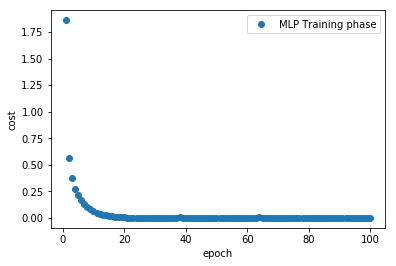

Model accuracy:  0.9618


In [29]:
cost_set = []
epoch_set = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist_images.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist_images.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
            avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})/total_batch
        if epoch % display_step==0:
            print('Epoch: ', '%04d'%(epoch+1), 'cost: ', '{:.9f}'.format(avg_cost))
        cost_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print('Training phase finished')
    
    plt.plot(epoch_set, cost_set, 'o', label = 'MLP Training phase')
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.legend()
    plt.show()
    
    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print("Model accuracy: ", accuracy.eval({\
        x:mnist_images.test.images,\
        y:mnist_images.test.labels\
    }))